In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')

from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
import pyspark
import pandas as pd
from pyspark.sql import *
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('Data_Transforme').getOrCreate()
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.types import StructType, StructField, IntegerType
import numpy as np
from pyspark.sql import functions as F




pandasDF = pd.read_csv('/home/ubuntu/BDAS_yang124/Datasets/College.csv')
sparkDF = spark.createDataFrame(pandasDF)
df = sparkDF.selectExpr(
 'Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 "`F.Undergrad` as F_Undergrad",
 "`P.Undergrad` as P_Undergrad",
 'Outstate',
 "`Room.Board` as Room_Board",
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 "`S.F.Ratio` as S_F_Ratio",
 "`perc.alumni` as perc_alumi",
 'Expend',
"`Grad.Rate` as Grad_Rate" )
df.show(8)
# df.withColumn('Id_New',when(df.Rank <= 5,df.Id).otherwise('other')).drop(df.Id).select(col('Id_New').alias('Id'),col('Rank')).show()

+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+----------+------+---------+
|Private|Apps|Accept|Enroll|Top10perc|Top25perc|F_Undergrad|P_Undergrad|Outstate|Room_Board|Books|Personal|PhD|Terminal|S_F_Ratio|perc_alumi|Expend|Grad_Rate|
+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+----------+------+---------+
|    Yes|1660|  1232|   721|       23|       52|       2885|        537|    7440|      3300|  450|    2200| 70|      78|     18.1|        12|  7041|       60|
|    Yes|2186|  1924|   512|       16|       29|       2683|       1227|   12280|      6450|  750|    1500| 29|      30|     12.2|        16| 10527|       56|
|    Yes|1428|  1097|   336|       22|       50|       1036|         99|   11250|      3750|  400|    1165| 53|      66|     12.9|        30|  8735|       54|
|    Yes| 417|   349|   137|       60|       8

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


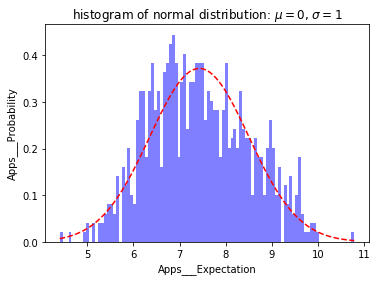

In [23]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



def demo2(feature_name):
    num_bins = 100
    x = df.select(feature_name).toPandas()[feature_name]
    mu = np.mean(x)
    sigma =np.std(x) 
    n, bins, patches = plt.hist(x, num_bins, density=True, facecolor = 'blue', alpha = 0.5)
 
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel(feature_name +"___"+ 'Expectation')
    plt.ylabel(feature_name +"___"+ 'Probability')
    plt.title('histogram of normal distribution: $\mu = 0$, $\sigma=1$')

    plt.subplots_adjust(left = 0.15)
    plt.show()

demo2('Apps')